In [1]:
import unittest
import re

In [2]:
test_prog = '''b inc 5 if a > 1
a inc 1 if b < 5
c dec -10 if a >= 1
c inc -20 if c == 10'''.split('\n')
real_prog = [i.strip() for i in open('input.txt').readlines()]

In [3]:
class VM(object):
    def __init__(self, progl):
        self.prog = progl[:]
        self.registers = dict()
        self.max = 0 # OK because registers initialised to 0
    
    def run(self):
        for l in self.prog:
            self.execute(l)
            m = self.regmax()
            if m > self.max:
                self.max = m
        return self
    
    linematcher = re.compile(r'^([^ ]+) (inc|dec) (-?[0-9]+) if ([^ ]+) ([^ ]+) ([^ ]+)$')

    def execute(self, l):
        target_reg, op, delta, test_l, cond, test_r = VM.linematcher.match(l).groups()
        delta = self.value(delta)
        if op == 'dec':
            delta = -delta
        if self.test(test_l, cond, test_r):
            self.set_reg(target_reg, self.get_reg(target_reg) + delta)   
        return self
    
    def test(self, a, op, b):
        a, b = map(self.value, (a, b))
        if op == '==':
            return a == b
        elif op == '!=':
            return a != b
        elif op == '>':
            return a > b
        elif op == '>=':
            return a >= b
        elif op == '<':
            return a < b
        elif op == '<=':
            return a <= b
        else:
            raise ValueError(f'unimplemented operator {op}')
        
    def value(self, v):
        try:
            return int(v)
        except ValueError:
            return self.get_reg(v)
            
    def get_reg(self, r):
        if r in self.registers:
            return self.registers[r]
        else:
            self.registers[r] = 0
            return 0
        
    def set_reg(self, r, val):
        self.registers[r] = val
    
    def regmax(self):
        try:
            return max(self.registers.values())
        except ValueError:
            return None
    
    def memmax(self):
        return self.max
    
    

In [4]:
class TestIt(unittest.TestCase):
    def test_01(self):
        testVM = VM(test_prog)
        testVM.run()
        self.assertEqual(testVM.regmax(), 1)
    def test_02(self):
        testVM = VM(test_prog)
        testVM.run()
        self.assertEqual(testVM.memmax(), 10)

In [5]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestIt)
unittest.TextTestRunner(verbosity=2).run(suite)

test_01 (__main__.TestIt) ... ok
test_02 (__main__.TestIt) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.015s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

In [6]:
vm = VM(real_prog)
vm.run()
print(f'part 1 answer {vm.regmax()}\npart 2 answer {vm.memmax()}')

part 1 answer 4902
part 2 answer 7037


In [7]:
l = []
vm = VM(real_prog)
for i in range(1000):
    vm.run()
    l.append([i+1, vm.regmax(), vm.memmax()])

import pandas as pd
df = pd.DataFrame(l, columns=['i', 'regmax', 'memmax'])

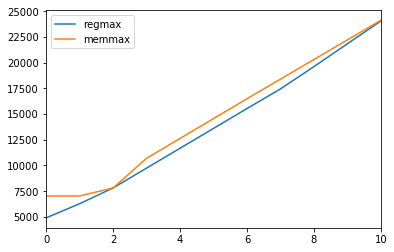

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
df.loc[0:10, ['regmax', 'memmax']].plot()

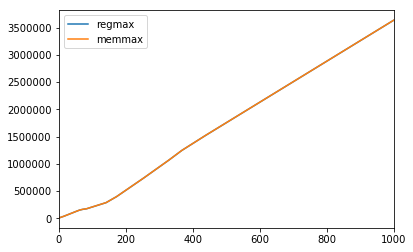

In [9]:
df.loc[:, ['regmax', 'memmax']].plot()

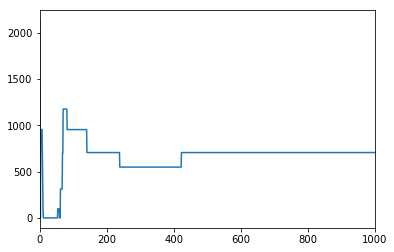

In [10]:
(df['memmax'] - df['regmax']).plot()